In [1]:
import pandas as pd
import numpy as np

In [24]:
data = pd.read_csv('datasets/tribune_daily_historical.csv')
data.head(10)
print(type(data.Snow[1])) # This column was originally a string because some of the missing values in the original data were represented by a string
print(data.Snow.dtype)    # Alternatively

<class 'numpy.float64'>
float64


In [25]:
data.Tmax = np.round((data.Tmax - 32) * 5/9);     # Degrees Farenheit to Celsius
data.Tmin = np.round((data.Tmin - 32) * 5/9);     # Degrees Farenheit to Celsius
data.Precipitation = data.Precipitation * 25.4;   # Inches to milimeters
data.Snow *= 25.4     # Alternative way           # Inches to milimeters

In [26]:
data.head(5) # Let's check our conversions

,Date,Tmax,Tmin,Precipitation,Snow
0,01/01/1900,0.0,-11.0,0.0,0.0
1,02/01/1900,7.0,-10.0,0.0,0.0
2,03/01/1900,12.0,-2.0,0.0,0.0
3,04/01/1900,11.0,-4.0,0.0,0.0
4,05/01/1900,9.0,-4.0,0.0,0.0


In [27]:
# Let's get some metrics for our dataframe

data.count()         # Total rows for each variable

# Get unique values
data.Snow.unique()   # Unique values for snow. 
data.Snow.nunique()  # Get number of unique values
# If you do this for dates or Tmax you may end up getting all the values, 
# since it is likely that all values are different. Snow is probably recorded using some coarse scale.

# Get mean, max, and min temperatures
data.Tmax.max()
data.Tmin.min()
data.Tmax.mean()
data.Tmin.mean()

# Some other handy stats
data.Tmax.quantile(0.95)
data.Tmax.median()
data.Tmax.std()       # Stadndard deviation
data.Tmax.var()       # Variance

# Using the describe function to get a summary of the entire table
data.describe()

,Tmax,Tmin,Precipitation,Snow
count,40177.000000,40177.000000,40177.000000,40177.000000
mean,19.807800,2.854817,1.172476,1.625898
std,11.529366,10.197319,4.878392,12.281397
min,-21.000000,-32.000000,0.000000,0.000000
25%,12.000000,-5.000000,0.000000,0.000000
50%,21.000000,3.000000,0.000000,0.000000
75%,29.000000,12.000000,0.000000,0.000000
max,42.000000,27.000000,165.100000,482.600000


In [28]:
# Give the dataframe an index corresponding to the date.
# helpful link for datetime formats: https://www.w3schools.com/python/python_datetime.asp
# This step does not convert the Date column into datetime.
#data.set_index(pd.DatetimeIndex(data['Date']), inplace=True).strftime('%m-%d-%Y')


In [33]:
# Let's check the format of the first date value
print(data.Date.dtype)

# This line converts the Date column into datetime format
data.Date = pd.to_datetime(data.Date, format='%d/%m/%Y',errors='coerce').dt.normalize();

# What happens if you only execute pd.to_datetime(data.Date) without the 'data.Date = ' part?'
#print(data.Date.dtype)

# Let's check the current state of our dataframe
data.head(40)

datetime64[ns]


,Date,Tmax,Tmin,Precipitation,Snow
0,1900-01-01,0.0,-11.0,0.0,0.0
1,1900-02-01,7.0,-10.0,0.0,0.0
2,1900-03-01,12.0,-2.0,0.0,0.0
3,1900-04-01,11.0,-4.0,0.0,0.0
4,1900-05-01,9.0,-4.0,0.0,0.0
5,1900-06-01,11.0,-3.0,0.0,0.0
6,1900-07-01,11.0,-4.0,0.0,0.0
7,1900-08-01,12.0,-2.0,0.0,0.0
8,1900-09-01,8.0,-7.0,0.0,0.0
9,1900-10-01,10.0,-7.0,0.0,0.0


In [34]:
# Now it's easy to get something like months and year
year = data.Date.dt.year;
month = data.Date.dt.month;
day = data.Date.dt.day;
DOY = data.Date.dt.dayofyear;
print(DOY[20:40])

20     21.0
21     22.0
22     23.0
23     24.0
24     25.0
25     26.0
26     27.0
27     28.0
28     29.0
29     30.0
30     31.0
31      2.0
32     33.0
33     61.0
34     92.0
35    122.0
36    153.0
37    183.0
38    214.0
39    245.0
Name: Date, dtype: float64


In [26]:
# Import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

30    31
31     1
32     2
33     3
34     4
35     5
36     6
37     7
38     8
39     9
Name: Date, dtype: int64


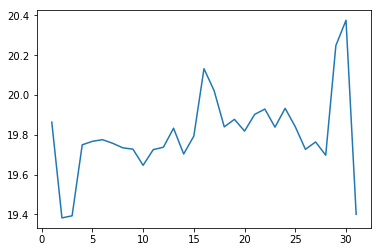

In [39]:
# Calculate mean maximum air temperature by day of the year and display data

Tmax_avg = data.Tmax.groupby(DOY).mean()
plt.plot(Tmax_avg)
print(DOY[30:40])

In [ ]:
# Find date of maximum temperature on record
idx_Tmax = data.Tmax.idxmax() # Find and store the row number (we call it index)
data.Date[idx_Tmax]           # Use the index to find the date.

In [ ]:
# Find the monthly rainfall
total_monthly_precipitation = data.Precipitation.groupby(month).sum();
#count_years = month.nunique()
#print(total_monthly_precipitation)
#plt.plot(total_precipitation_monthly / count_years)
print(year.unique())

In [32]:
data.head(34)

,Date,Tmax,Tmin,Precipitation,Snow
0,1900-01-01 00:01:00,0.0,-11.0,0.0,0.0
1,1900-01-02 00:01:00,7.0,-10.0,0.0,0.0
2,1900-01-03 00:01:00,12.0,-2.0,0.0,0.0
3,1900-01-04 00:01:00,11.0,-4.0,0.0,0.0
4,1900-01-05 00:01:00,9.0,-4.0,0.0,0.0
5,1900-01-06 00:01:00,11.0,-3.0,0.0,0.0
6,1900-01-07 00:01:00,11.0,-4.0,0.0,0.0
7,1900-01-08 00:01:00,12.0,-2.0,0.0,0.0
8,1900-01-09 00:01:00,8.0,-7.0,0.0,0.0
9,1900-01-10 00:01:00,10.0,-7.0,0.0,0.0


In [ ]:
year.head(367)